# 랜덤 포레스트(Random Forest) 내일 비가 올지 예측(Rain in Australia)
#### Reference : https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling

# 데이터 다운로드 및 업로드
### **먼저 아래 링크에서 weatherAUS.csv 파일을 다운로드 받기**
#### https://www.kaggle.com/jsphyg/weather-dataset-rattle-package



## 관련 라이브러리 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## 데이터 읽기

In [2]:
df = pd.read_csv('../data/weatherAUS.csv')
print(df.shape)

(145460, 23)


## 데이터 형상 파악하기

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

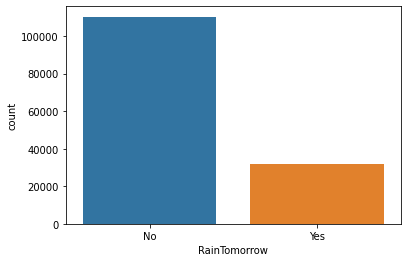

In [6]:
# searbon으로 으로 그래프를 그려보세요.
sns.countplot(x='RainTomorrow', data=df)

## 상관 분석(Correlation Analysis) 수행해보기

In [7]:
temp_df = df.copy()
temp_df1 = df.copy()
# Yes/No 값을 0, 1로 변경하기
#temp_df['RainToday'], temp_df['RainTomorrow'] 의 데이터, No 0, Yes 1로 변경
temp_df1['RainToday'].replace({"Yes":0, "No":1}, inplace=True)
temp_df1['RainTomorrow'].replace({"Yes":0, "No":1}, inplace=True)

In [8]:
# temp_df의 피처간의 상관계수 생성 : corr() 
corr = temp_df1.corr()

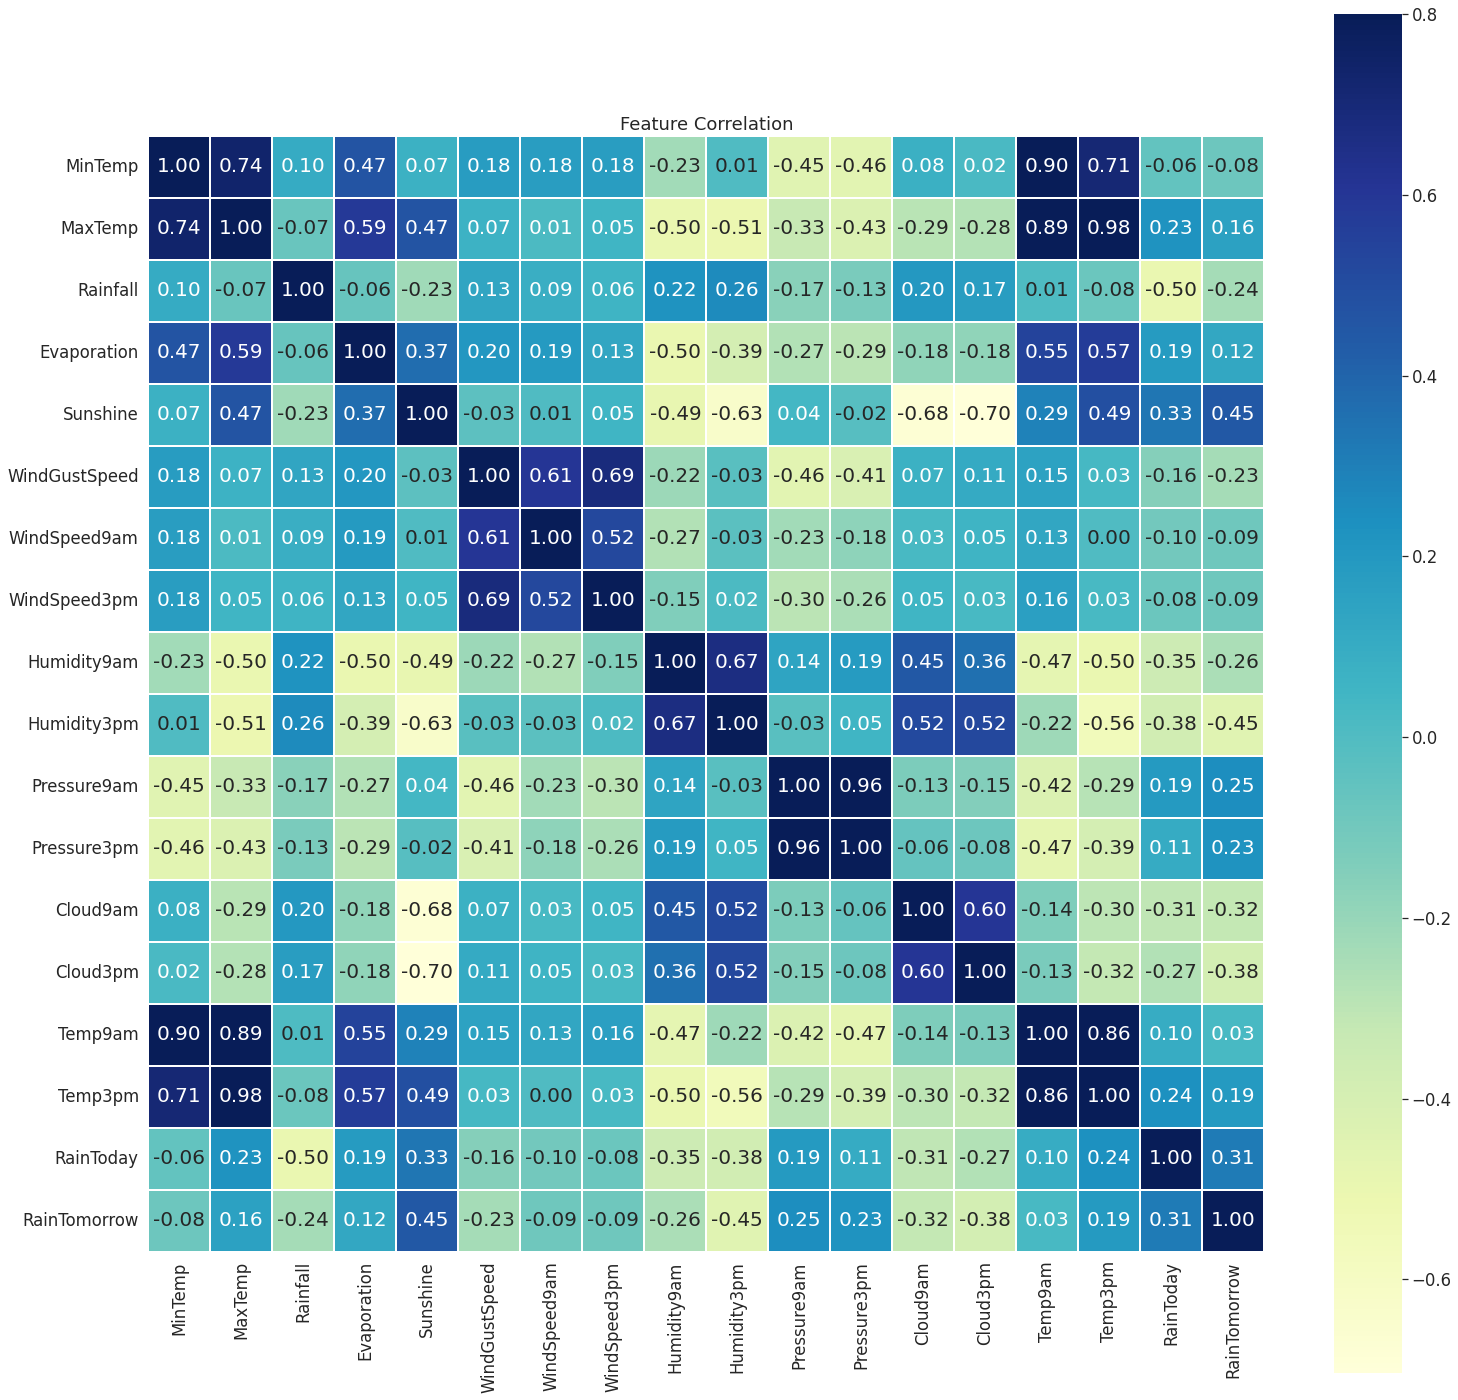

In [9]:
# heatmap() 그래프 그리기
plt.figure(figsize=(25, 25));
sns.set(font_scale=1.5); # plot의 글자크기 설정
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            fmt = '.2f', # annot의 출력 소숫점 자리 지정
            annot_kws={"size": 20},
            cmap='YlGnBu');
plt.title('Feature Correlation');

# 결측치(null값) 확인하기 - data 전처리

In [10]:
# null값의 평균을 계산하여 컬럼별 null의 비율 확인
temp_df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

## categorical column 확인하기

In [11]:
categorical = [col for col in temp_df.columns if temp_df[col].dtypes == 'object']
print(categorical)


['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## numerical column 확인하기

In [12]:
numerical = [col for col in temp_df.columns if temp_df[col].dtypes != 'object']
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# 결측치 개수 확인하기

In [13]:
# categorical column의 null 비율
temp_df[categorical].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainToday       0.022419
RainTomorrow    0.022460
WindDir3pm      0.029066
WindGustDir     0.070989
WindDir9am      0.072639
dtype: float64

In [14]:
# numerical column의 null 비율
temp_df[numerical].isnull().mean().sort_values()

MaxTemp          0.008669
MinTemp          0.010209
WindSpeed9am     0.012148
Temp9am          0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
Temp3pm          0.024811
Humidity3pm      0.030984
WindGustSpeed    0.070555
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

In [15]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치 채우기

# temp_df[numerical]=temp_df[numerical].mean()
# temp_df[numerical]=temp_df[numerical].median()
# temp_df[numerical]
for col in numerical:
    # if temp_df[col].isnull().mean() > 0:
        col_median = temp_df[col].median()
        temp_df[col].fillna(col_median, inplace = True) # 이렇게 구분해서 결측치를 채워야 한다. 아니면 오류 생김

In [16]:
# categorical 커럼에서 0 이상인것 출력 확인
for col in categorical:
    if temp_df[col].isnull().mean() > 0:
        print(col, (temp_df[col].isnull().mean()))

WindGustDir 0.0709885879279527
WindDir9am 0.07263852605527293
WindDir3pm 0.02906641000962464
RainToday 0.022418534304963565
RainTomorrow 0.02245978275814657


In [17]:
# categorical value를 가진 column은 최빈값(mode)으로 결측치 채우기
temp_df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
temp_df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
temp_df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
temp_df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
# temp_df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)





In [18]:
temp_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
temp_df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [20]:
# 날짜는 필요하지 않음로 column drop하기
temp_df.drop('Date', axis=1, inplace=True)


In [21]:
temp_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
temp_df.isnull().mean().sort_values()

Location         0.00000
Temp3pm          0.00000
Temp9am          0.00000
Cloud3pm         0.00000
Cloud9am         0.00000
Pressure3pm      0.00000
Pressure9am      0.00000
Humidity3pm      0.00000
Humidity9am      0.00000
WindSpeed3pm     0.00000
WindSpeed9am     0.00000
WindDir3pm       0.00000
WindDir9am       0.00000
WindGustSpeed    0.00000
WindGustDir      0.00000
Sunshine         0.00000
Evaporation      0.00000
Rainfall         0.00000
MaxTemp          0.00000
MinTemp          0.00000
RainToday        0.00000
RainTomorrow     0.02246
dtype: float64

## RainTomorrow가 null인 row들 삭제하기
- 예측 값이므로 nul 값 삭제함

In [23]:
temp_df.shape

(145460, 22)

In [24]:
# df['RainTomorrow'] 의 NaN 값 drop 하기
temp_df.dropna(inplace=True, axis=0)
# temp_df.dropna(subset=['RainTomorrow'], inplace=True)
temp_df['RainTomorrow']

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 142193, dtype: object

In [25]:
temp_df.shape

(142193, 22)

In [26]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [27]:
temp_df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Yes/No 값에 대한 변환

In [28]:
# Yes/No 값을 0, 1로 변경하기
temp_df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
temp_df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

## categorical value에 one-hot encoding 적용하기

In [29]:
temp_df = pd.get_dummies(temp_df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [30]:
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
temp_df.shape

(142193, 115)

# 트레이닝 데이터 준비하기

In [32]:
X = temp_df.drop(['RainTomorrow'], axis=1)
y = temp_df['RainTomorrow']

In [33]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 결정 트리(Decision Tree)로 내일 비가 올지 안올지 예측해보기

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
score = accuracy_score(y_test,y_pred)
print('결정 트리(Decision Tree) Accuracy :',score)

결정 트리(Decision Tree) Accuracy : 0.7884243468476388


### [문제] 정확도, 정밀도, 재현율, f1-스코아를 값을 확인해 보세요.

In [38]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22040
           1       0.53      0.53      0.53      6399

    accuracy                           0.79     28439
   macro avg       0.70      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439



## 랜덤 포레스트(Random Forest)로 내일 비가 올지 안올지 예측해보기
참고 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- DT default = 100개를 만들어서 학습을 시킴

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# 정확도 평가
score = accuracy_score(y_test, y_pred)
print('랜덤 포레스트(Random Forest) Accuracy :', score)

랜덤 포레스트(Random Forest) Accuracy : 0.8556911283800415


In [42]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22040
           1       0.78      0.50      0.61      6399

    accuracy                           0.86     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439

